# <font color='brown'>楼 + 机器学习实战</font>

# 挑战：使用 Keras 构建序贯模型

## 挑战介绍

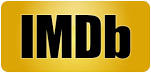

Keras 中的序贯模型大大增强了其易用性，你可以按照更加直观的方式快速构建神经网络结构。本次挑战的目的，是掌握并熟悉序贯模型的构建过程，并完成对 IMDB 电影评论情感预测。

## 挑战知识点

- Keras 构建序贯模型
- IMDB 数据集

---

## 挑战内容

### IMDB 数据集

和之前接触过的众多数据集一样，IMDB 数据集是一个非常流行的基准数据集，很多论文用它来测试算法的性能。IMDB 数据来源于著名的互联网电影数据库 [IMDB.COM](https://www.imdb.com/)。

该数据集共有 50000 条评论数据，并被打上了 **`积极(1)`** 或 **`消极(0)`** 的标签。数据集中的每一条评论都经过预处理，并编码为词索引（整数）的序列表示。词索引的意思是，将词按数据集中出现的频率进行索引，例如整数 `3` 编码了数据中第三个最频繁的词。

一般情况下，IMDB 数据集会被划分为训练集和测试集各占一半，斯坦福研究人员在 2011 年发布该数据集时，得到的预测准确率为 `88.89%`。

由于数据集托管在外网服务器上，国内的下载速度较慢，你可以通过运行下面的单元格从实验楼服务器上下载数据集。

In [ ]:
# 从实验楼服务器下载数据集
!wget -P /root/.keras/datasets http://labfile.oss.aliyuncs.com/courses/1081/imdb.npz
!wget -P /root/.keras/datasets http://labfile.oss.aliyuncs.com/courses/1081/imdb_word_index.json

下面，我们通过 Keras 自带的数据集模块来加载该数据集：

In [ ]:
import numpy as np
from keras.datasets import imdb

# 加载数据, num_words 表示只考虑最常用的 n 个词语，代表本次所用词汇表大小
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=1000)

# 合并训练及测试数据
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# 查看合并后形状
X.shape, y.shape

可以看到，总共有 `50000` 条数据。你可以输出其中的数据查看，X 为评论的词索引，`numpy.ndarray` 类型，但每一条数据为列表类型；y 为情绪，`numpy.ndarray` 类型，但每一条数据为整型。

如果你输出 `X[0]` 查看第一条评论，你看到的一定是词索引。那么如果想看到原评论内容就需要通过索引找到原单词，可以通过如下代码完成：

In [ ]:
index = imdb.get_word_index() # 获取词索引表
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
comment = " ".join( [reverse_index.get(i - 3, "#") for i in X[0]] ) # 解码第 1 条评论
comment

如果你细心的话，你会发现每条评论的长度大小不一。但是神经网络输入时，我们必须保证每一条数据的形状是一致的，所以这里需要对数据进行预处理。

这里我们使用 `keras.preprocessing.sequence()` 进行处理，通过指定最大长度 `maxlen` 达到裁切向量的目的。同时，如果原句子长度不足，将会在头部通过 `0` 填充。

In [ ]:
from keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

X_train.shape, X_test.shape

### 构建序贯模型

接下来，我们就使用 Keras 序贯模型来构建一个神经网络结构，对数据进行分类预测。

---

**<font color='red'>挑战</font>：请通过观察题目给出的 `model.summary()` 输出的模型结构图，确定模型的层及相应的形状参数。**

**<font color='blue'>规定</font>**：序贯模型结构如下所示：

    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    embedding_1 (Embedding)      (None, 100, 64)           64000     
    _________________________________________________________________
    flatten_1 (Flatten)          (None, 6400)              0         
    _________________________________________________________________
    dense_1 (Dense)              (None, 250)               1600250   
    _________________________________________________________________
    dropout_1 (Dropout)          (None, 250)               0         
    _________________________________________________________________
    dense_2 (Dense)              (None, 50)                12550     
    _________________________________________________________________
    dense_3 (Dense)              (None, 1)                 51        
    =================================================================
    Total params: 1,676,851
    Trainable params: 1,676,851
    Non-trainable params: 0
    _________________________________________________________________

除了输出层使用 `sigmoid` 激活，其他需要激活函数的层均使用 `relu` 激活函数。除此之外，除了配置输入张量的形状，其他参数使用默认即可。

**<font color='green'>提示</font>**：你可能需要阅读 [Keras 中文官方文档](https://keras.io/zh)

Embedding：

- __input_dim__: `int > 0`，词汇表大小。
- __output_dim__: `int >= 0`，词向量的维度。
- __input_length__: 输入序列的长度，当它是固定的时候。
如果你需要连接 `Flatten` 和 `Dense` 层，则这个参数是必须的。

In [ ]:
input_array = np.random.randint(10, size=(1, 10))
input_array

In [ ]:
model = Sequential()
model.add(layers.Embedding(10, 2, input_length=10))
model.compile('adam', 'mse')

In [ ]:
pred = model.predict(input_array)
pred

In [ ]:
"""构建序贯模型
"""
from keras.models import Sequential
from keras import layers

### 代码开始 ### (≈ 7 行代码)
model = Sequential()
model.add(layers.Embedding(1000, 64, input_length=100))
model.add(layers.Flatten())
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dense(1, activation='sigmoid'))
### 代码结束 ###

**运行测试：**

In [ ]:
model.summary()

<center>**期望输出结果与规定一致。**</center>

定义好模型结果之后，就需要指定损失函数和优化器。

---

---

**<font color='red'>挑战</font>：请按规定设置损失函数及优化器，并完成模型编译及训练。**

**<font color='blue'>规定</font>**：
- 损失函数：交叉熵损失函数 `binary_crossentropy`。
- 优化器：Adam 算法优化器。
- 评估方式：分类准确率`accuracy`。

训练时，每一个 `batch_size` 设为 `32`，`2` 个 Epoch。

In [ ]:
"""编译模型并完成训练
"""

### 代码开始 ### (≈ 2 行代码)
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model.fit(X_train, y_train, epochs= 2, batch_size = 32, validation_data = (X_test, y_test))
### 代码结束 ###

**期望输出：**

一般情况下，按上文规定结构配置的神经网络，在测试集上迭代两个 epches 之后，最终的准确率能达到 `80%` 以上。示例输出如下：

    Train on 25000 samples, validate on 25000 samples
    Epoch 1/2
    25000/25000 [==============================] - 172s 7ms/step - loss: 0.4663 - acc: 0.7677 - val_loss: 0.4163 - val_acc: 0.8052
    Epoch 2/2
    25000/25000 [==============================] - 167s 7ms/step - loss: 0.2901 - acc: 0.8766 - val_loss: 0.4243 - val_acc: 0.8073

通过上面的挑战，我们就完成了一个简单的序贯模型构建。可以看到，两个 epches 之后的准确度就已经很接近研究人员在论文中得到的准确率了。当然，这只是一个简单的结构，后面学习循环神经网络之后，还能得到更好的效果。

---

<div style="color: #999;font-size: 12px;font-style: italic;">*本课程内容，由作者授权实验楼发布，未经允许，禁止转载、下载及非法传播。</div>